# Notebook version of the programming 1 assignment
some explorations of the data.

In [1]:
from treevolume.functions import TreeVolumePredictor, DataHelper


In [3]:
from treevolume import compare_functions
compare_functions.whole_analysis(output_filename="/tmp/treevolume_analysis.json")


2022-02-02 21:03:14.817 | INFO     | treevolume.compare_functions:prepare_schepaschenko_data:24 - evaluate Schepaschenko measurements with the volume estimator functions.
/home/christian/anaconda3/envs/programming_1_exam/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/christian/anaconda3/envs/programming_1_exam/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/christian/anaconda3/envs/programming_1_exam/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
2022-02-02 21:03:17.684 | INFO     | treevolume.compare_functions:compare_functions:66 - calculate volume for Pinus Sylvestris using Denzin equation
2022-02-02 21:03:17.693 | INFO     | treevolume.compare_functions:compare_functions:85 - calculate vo

In [5]:
dataHelper = DataHelper()

In [7]:
df_gutten = dataHelper.get_gutten_df()

df_gutten_filtered = df_gutten[(df_gutten["age.base"] == 60) & ( df_gutten["site"] == 1) ]

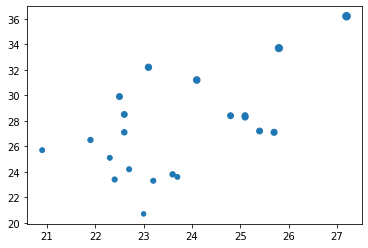

In [8]:
import matplotlib.pyplot as plt


plt.scatter(df_gutten_filtered["height"],
            df_gutten_filtered["dbh.cm"],
            s=list(df_gutten_filtered["volume"]/20))
plt.show()


In [9]:
dataHelper.get_schepaschenko2017_df().keys()

/home/christian/anaconda3/envs/programming_1_exam/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/christian/anaconda3/envs/programming_1_exam/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/christian/anaconda3/envs/programming_1_exam/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


dict_keys(['Tree_db', 'Ecoregions', 'References', 'Field description'])

In [10]:
df_tree_db = dataHelper.get_schepaschenko2017_df()["Tree_db"]
df_tree_db.columns = df_tree_db.columns.str.replace(' ', '_').str.lower()
df_tree_db.head()

/home/christian/anaconda3/envs/programming_1_exam/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/christian/anaconda3/envs/programming_1_exam/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/christian/anaconda3/envs/programming_1_exam/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


id              species  tree_age   dbh  h_tree  hcr  dcr    vtot  vbark  \
0   1  Pinus sylvestris L.      11.0   1.4    2.25  NaN  NaN    0.64    NaN   
1   2  Pinus sylvestris L.      14.0   3.1    4.32  NaN  NaN    1.90    NaN   
2   3  Pinus sylvestris L.      55.0  22.0   21.00  NaN  NaN  406.00    NaN   
3   4  Pinus sylvestris L.      65.0  25.0   24.50  NaN  NaN  601.00    NaN   
4   5  Pinus sylvestris L.      70.0  28.0   26.00  NaN  NaN  747.00    NaN   

    origin  ...               location  country  latitude  longitude  \
0  Natural  ...       England: Brandon      GBR      52.5      1.883   
1  Natural  ...       England: Brandon      GBR      52.5      1.883   
2  Natural  ...  Winterthur, Adlisberg      SWZ      47.0      9.000   
3  Natural  ...  Winterthur, Adlisberg      SWZ      47.0      9.000   
4  Natural  ...  Winterthur, Adlisberg      SWZ      47.0      9.000   

   altitude_(m.s.l.)  tree_number_/_ha       reference notes ecoregion  \
0                NaN           58010.0  Ovington, 1957   NaN     80421   
1                NaN           27750.0  Ovington, 1957   NaN     80421   
2                NaN             999.0    Burger, 1948   NaN     80501   
3                NaN             678.0    Burger, 1948   NaN     80501   
4                NaN             600.0    Burger, 1948   NaN     80501   

   id_plot  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  

[5 rows x 27 columns]

Find a specific tree species which has values for total volume and tree height

In [11]:
df_tree_filtered = df_tree_db[df_tree_db['species'].str.contains("Pinus sylvestris L.") 
           & ( df_tree_db["vtot"].notnull() ) & (df_tree_db["h_tree"].notnull() )]

df_tree_filtered

id              species  tree_age   dbh  h_tree   hcr  dcr    vtot  \
0        1  Pinus sylvestris L.      11.0   1.4    2.25   NaN  NaN    0.64   
1        2  Pinus sylvestris L.      14.0   3.1    4.32   NaN  NaN    1.90   
2        3  Pinus sylvestris L.      55.0  22.0   21.00   NaN  NaN  406.00   
3        4  Pinus sylvestris L.      65.0  25.0   24.50   NaN  NaN  601.00   
4        5  Pinus sylvestris L.      70.0  28.0   26.00   NaN  NaN  747.00   
...    ...                  ...       ...   ...     ...   ...  ...     ...   
9564  9565  Pinus sylvestris L.      13.0   5.6    4.60   2.0  1.0    5.00   
9565  9566  Pinus sylvestris L.      12.0   9.6    4.50   0.6  3.0    9.00   
9566  9567  Pinus sylvestris L.      38.0  17.8   15.20   8.1  2.8  156.00   
9567  9568  Pinus sylvestris L.      38.0  22.1   20.50  10.0  3.5  333.00   
9568  9569  Pinus sylvestris L.      42.0  22.0   21.50  13.5  3.2  316.00   

      vbark   origin  ...               location  country  latitude  \
0       NaN  Natural  ...       England: Brandon      GBR      52.5   
1       NaN  Natural  ...       England: Brandon      GBR      52.5   
2       NaN  Natural  ...  Winterthur, Adlisberg      SWZ      47.0   
3       NaN  Natural  ...  Winterthur, Adlisberg      SWZ      47.0   
4       NaN  Natural  ...  Winterthur, Adlisberg      SWZ      47.0   
...     ...      ...  ...                    ...      ...       ...   
9564    NaN      NaN  ...                    NaN      UKR      48.5   
9565    2.0      NaN  ...                    NaN      UKR      48.5   
9566   13.0      NaN  ...                    NaN      UKR      48.5   
9567   23.0      NaN  ...                    NaN      UKR      48.5   
9568   36.0      NaN  ...                    NaN      UKR      48.5   

      longitude  altitude_(m.s.l.)  tree_number_/_ha            reference  \
0         1.883                NaN           58010.0       Ovington, 1957   
1         1.883                NaN           27750.0       Ovington, 1957   
2         9.000                NaN             999.0         Burger, 1948   
3         9.000                NaN             678.0         Burger, 1948   
4         9.000                NaN             600.0         Burger, 1948   
...         ...                ...               ...                  ...   
9564     34.900                NaN               NaN  Lakyda et al., 2016   
9565     34.900                NaN               NaN  Lakyda et al., 2016   
9566     34.900                NaN               NaN  Lakyda et al., 2016   
9567     34.900                NaN               NaN  Lakyda et al., 2016   
9568     34.900                NaN               NaN  Lakyda et al., 2016   

     notes ecoregion  id_plot  
0      NaN     80421      NaN  
1      NaN     80421      NaN  
2      NaN     80501      NaN  
3      NaN     80501      NaN  
4      NaN     80501      NaN  
...    ...       ...      ...  
9564   NaN     80814  12262.0  
9565   NaN     80814  12262.0  
9566   NaN     80814  12263.0  
9567   NaN     80814  12263.0  
9568   NaN     80814  12263.0  

[2890 rows x 27 columns]

plot tree volume

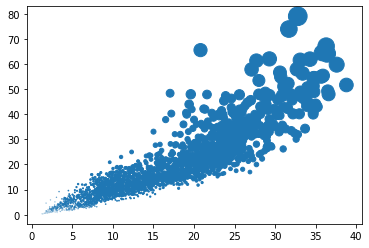

In [12]:
import matplotlib.pyplot as plt

list(df_tree_filtered["vtot"])

plt.scatter(df_tree_filtered["h_tree"],
            df_tree_filtered["dbh"],
            s=list(df_tree_filtered["vtot"]/20))
plt.show()

